# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mutiara Rahma Cahyani Warli
- **Email:** mutiarahmaa122@gmail.com
- **ID Dicoding:** mutiara_rahma_122

## Menentukan Pertanyaan Bisnis

1. Apa kategori produk dengan jumlah penjualan tertinggi pada bulan Desember, yang umumnya dibeli ornag untuk menyambut Natal dan Tahun Baru?
2. Berapa persentase transaksi pada masing-masing metode pembayaran yang dilakukan di bulan Desember?

## Import Semua Packages/Library yang Digunakan

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Data Wrangling**

### Gathering Data

In [50]:
# Menampilkan tabel order_items
order_items_df = pd.read_csv("https://raw.githubusercontent.com/mutiarhm122/e-commerce-public-dataset/refs/heads/master/Dataset/order_items_dataset.csv")
oi_df = order_items_df
oi_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [51]:
# Menampilkan tabel orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/mutiarhm122/e-commerce-public-dataset/refs/heads/master/Dataset/orders_dataset.csv")
od_df = orders_df
od_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [52]:
# Menampilkan tabel products
products_df = pd.read_csv("https://raw.githubusercontent.com/mutiarhm122/e-commerce-public-dataset/refs/heads/master/Dataset/products_dataset.csv")
pd_df = products_df
pd_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [53]:
# Menampilkan tabel order_payments
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/mutiarhm122/e-commerce-public-dataset/refs/heads/master/Dataset/order_payments_dataset.csv")
op_df = order_payments_df
op_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

#### Tabel Order Item

In [54]:
oi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [55]:
# Melihat jumlah duplikasi data
print("Jumlah duplikasi: ", oi_df.duplicated().sum())
oi_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Tabel Orders

In [56]:
od_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [57]:
# Melihat jumlah missing value
od_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [58]:
# Melihat jumlah duplikasi data
print("Jumlah duplikasi: ", od_df.duplicated().sum())
od_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Tabel Products

In [59]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Melihat jumlah missing value
pd_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Melihat jumlah duplikasi data
print("Jumlah duplikasi: ", pd_df.duplicated().sum())
pd_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Tabel Order Payment

In [60]:
op_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [61]:
# Melihat jumlah duplikasi data
print("Jumlah duplikasi: ", op_df.duplicated().sum())
op_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


## **Insight:**


1.   Tabel Order Item
  - Kolom **shipping_limit_date** bertipe object, sehingga perlu diganti menjadi datetime.
  - Kolom **order_item_id**, **seller_id**, dan **freight_value** akan dihapus karena tidak berhubungan dengan pertanyaan bisnis.

2.   Tabel Orders
  - Terdapat missing value pada kolom **order_approved_at**, **order_delivered_carrier_date**, dan **order_delivered_customer_date**.
  - Kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date** bertipe object, sehingga perlu diubah menjadi datetime.
  - Akan tetapi, kolom yang akan digunakan hanyalah kolom **order_id** dan **order_purchase_timestamp**, sehingga kolom lainnya akan dihapus.

3.   Tabel Products
  - Terdapat missing value pada kolom **product_category_name**, **product_name_lenght**, **product_description_lenght**, dan **product_photos_qty**.
  - Menghapus kolom **product_name_lenght**, **product_description_lenght**, **product_photos_qty**, **product_weight_g**, **product_length_cm**, **product_height_cm**, dan **product_width_cm**.
  - Terdapat 610 missing value pada kolom **product_category_name**, yang nantinya akan diisi dengan modus.
4.   Tabel Order Payment
  - Data telah bersih dan siap digunakan.

### **Cleaning Data**

#### Order Item Table

In [62]:
# Menghapus beberapa kolom
oi_df.drop(columns=['order_item_id', 'seller_id', 'freight_value'], inplace=True)
oi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   product_id           112650 non-null  object 
 2   shipping_limit_date  112650 non-null  object 
 3   price                112650 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.4+ MB


In [63]:
# mengubah tipe data
datetime_columns = ['shipping_limit_date']

for column in datetime_columns:
  oi_df[column] = pd.to_datetime(oi_df[column])

oi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   product_id           112650 non-null  object        
 2   shipping_limit_date  112650 non-null  datetime64[ns]
 3   price                112650 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.4+ MB


#### Orders Table

In [64]:
# Menghapus beberapa kolom
od_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)
od_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [65]:
# Mengubah tipe data
datetime_columns = ['order_purchase_timestamp']

for column in datetime_columns:
  od_df[column] = pd.to_datetime(od_df[column])

od_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


#### Products Table

In [66]:
# Menghapus beberapa kolom
pd_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [67]:
# Mencari nilai yang paling sering muncul
modus_product = pd_df['product_category_name'].mode()[0]
print(modus_product)

cama_mesa_banho


In [14]:
# Mengisi missing value dengan modus
pd_df['product_category_name'].fillna(modus_product, inplace=True)
pd_df.isna().sum()

<ipython-input-14-640e0437b649>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pd_df['product_category_name'].fillna(modus_product, inplace=True)


,0
product_id,0
product_category_name,0


**Insight:**
1. Beberapa kolom pada tabel order_item telah dihapus dan hanya menyisakan **order_id**, **product_id**, **shipping_limit_date**, dan **price**. Kolom **shipping_limit_date** juga telah diubah tipenya menjadi datetime.
2. Beberapa kolom pada tabel orders telah dihapus dan hanya menyisakan **order_id**, **customer_id**, **order_status**, dan **order_purchase_timestamp**. Kolom **order_purchase_timestamp** juga telah diubah tipenya menjadi datetime.
3. Beberapa kolom pada tabel order_item telah dihapus dan hanya menyisakan **product_id**, **product_category_name**. Beberapa missing value pada kolom **product_category_name** juga telah diisi dengan nilai yang paling sering muncul, yakni cama_mesa_banho.

## Exploratory Data Analysis (EDA)

### **Explore Table**

In [ ]:
oi_df.describe(include='all')

,order_id,product_id,shipping_limit_date,price
count,112650,112650,112650,112650.000000
unique,98666,32951,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN
freq,21,527,NaN,NaN
mean,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739
min,NaN,NaN,2016-09-19 00:15:34,0.850000
25%,NaN,NaN,2017-09-20 20:57:27.500000,39.900000
50%,NaN,NaN,2018-01-26 13:59:35,74.990000
75%,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000
max,NaN,NaN,2020-04-09 22:35:08,6735.000000


In [ ]:
od_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp
count,99441,99441,99441,99441
unique,99441,99441,8,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN
freq,1,1,96478,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120
min,NaN,NaN,NaN,2016-09-04 21:15:19
25%,NaN,NaN,NaN,2017-09-12 14:46:19
50%,NaN,NaN,NaN,2018-01-18 23:04:36
75%,NaN,NaN,NaN,2018-05-04 15:42:16
max,NaN,NaN,NaN,2018-10-17 17:30:18


In [ ]:
pd_df.describe(include='all')

,product_id,product_category_name
count,32951,32951
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3639


In [ ]:
op_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### **Insight:**
- Data untuk bulan Desember tersedia untuk tahun 2016 dan 2017.
- Kategori produk yang memiliki produk paling banyak adalah cama_mesa_banho.
- Jenis metode pembayaran yang paling banyak digunakan adalah credit_card.

### **Create Sales Table**

In [15]:
# Join tabel order_item dan product
sales_product_df = pd.merge(
    left=oi_df,
    right=pd_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sp_df = sales_product_df
sp_df.head()

,order_id,product_id,shipping_limit_date,price,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,ferramentas_jardim


In [16]:
# Join tabel sales_product dan orders
sales_df = pd.merge(
    left=sp_df,
    right=od_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
sales_df.head()

,order_id,product_id,shipping_limit_date,price,product_category_name,customer_id,order_status,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51


#### **Explore sales_df**

In [ ]:
sales_df.describe(include='all')

,order_id,product_id,shipping_limit_date,price,product_category_name,customer_id,order_status,order_purchase_timestamp
count,112650,112650,112650,112650.000000,112650,112650,112650,112650
unique,98666,32951,NaN,NaN,73,98666,7,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,cama_mesa_banho,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN
freq,21,527,NaN,NaN,12718,21,110197,NaN
mean,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,NaN,NaN,NaN,2018-01-01 00:09:48.464376576
min,NaN,NaN,2016-09-19 00:15:34,0.850000,NaN,NaN,NaN,2016-09-04 21:15:19
25%,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,NaN,NaN,NaN,2017-09-13 19:17:04
50%,NaN,NaN,2018-01-26 13:59:35,74.990000,NaN,NaN,NaN,2018-01-19 23:02:16
75%,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,NaN,NaN,NaN,2018-05-04 17:30:36.750000128
max,NaN,NaN,2020-04-09 22:35:08,6735.000000,NaN,NaN,NaN,2018-09-03 09:06:57


In [23]:
# Melakukan filter data untuk bulan Desember
filtered_df = sales_df[
    (sales_df['order_purchase_timestamp'].dt.month == 12)]

# Grouping berdasarkan kategori produk dan total sales
sales_summary = filtered_df.groupby('product_category_name')['product_id'].count().reset_index()

sales_summary.rename(columns={'product_id': 'total_orders'}, inplace=True)

sales_result = sales_summary.sort_values(by='total_orders', ascending=False)
sales_result.head()

,product_category_name,total_orders
12,cama_mesa_banho,698
29,esporte_lazer,493
10,beleza_saude,466
11,brinquedos,445
48,moveis_decoracao,390


### **Insight**
- Kategori produk yang paling laku pada bulan Desember adalah **cama_mesa_banho** dengan jumlah 698 penjualan, dilanjutkan dengan kategori **esporte_lazer** dan **beleza_saude**.

### **Create Payment Table**

In [24]:
# Join tabel sales dan order_payment
payment_df = pd.merge(
    left=sales_df,
    right=op_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payment_df.head()

,order_id,product_id,shipping_limit_date,price,product_category_name,customer_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,1.0,credit_card,3.0,218.04


In [25]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  117604 non-null  object        
 1   product_id                117604 non-null  object        
 2   shipping_limit_date       117604 non-null  datetime64[ns]
 3   price                     117604 non-null  float64       
 4   product_category_name     117604 non-null  object        
 5   customer_id               117604 non-null  object        
 6   order_status              117604 non-null  object        
 7   order_purchase_timestamp  117604 non-null  datetime64[ns]
 8   payment_sequential        117601 non-null  float64       
 9   payment_type              117601 non-null  object        
 10  payment_installments      117601 non-null  float64       
 11  payment_value             117601 non-null  float64       
dtypes:

In [26]:
# Mengisi missing value dengan modus
payment_df['payment_sequential'].fillna(value=payment_df['payment_sequential'].mode()[0], inplace=True)
payment_df['payment_type'].fillna(value=payment_df['payment_type'].mode()[0], inplace=True)
payment_df['payment_installments'].fillna(value=payment_df['payment_installments'].mode()[0], inplace=True)
payment_df['payment_value'].fillna(value=payment_df['payment_value'].mode()[0], inplace=True)

<ipython-input-26-e8bcdb1f783c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  payment_df['payment_sequential'].fillna(value=payment_df['payment_sequential'].mode()[0], inplace=True)
<ipython-input-26-e8bcdb1f783c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [29]:
payment_df.isnull().sum()

,0
order_id,0
product_id,0
shipping_limit_date,0
price,0
product_category_name,0
customer_id,0
order_status,0
order_purchase_timestamp,0
payment_sequential,0
payment_type,0


#### **Explore payment_df**

In [31]:
# Menampilkan data payment_type yang paling banyak digunakan selama bulan Desember
december_payment = payment_df[payment_df['order_purchase_timestamp'].dt.month == 12]
payment_counts = december_payment['payment_type'].value_counts()

print(payment_counts)

payment_type
credit_card    4838
boleto         1325
voucher         335
debit_card       67
Name: count, dtype: int64


### **Insight:**
- Metode pembayaran yang paling banyak digunakan selama bulan Desember adalah **credit_card** dengan 4837 kali, dilanjutkan dengan boleto dan voucher.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

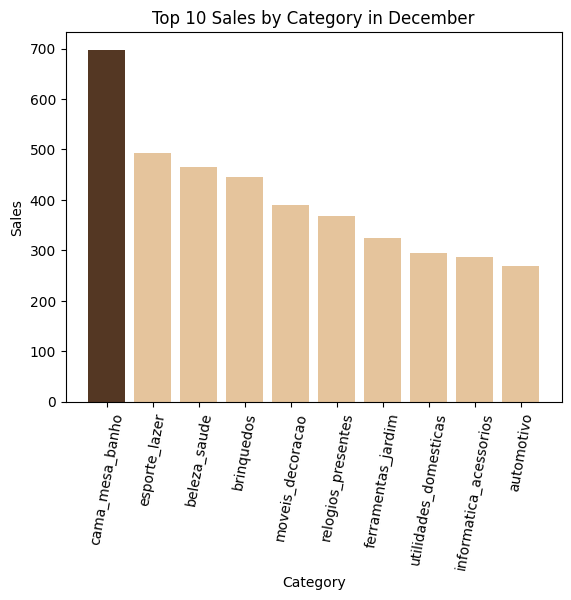

In [44]:
# Menampilkan 10 kategori produk dnegan sales tertinggi
top_10_sales = sales_summary.sort_values(by="total_orders", ascending=False).head(10)

# Memberikan warna berbade untuk kategori dengan sales tertinggi
top_1_category = sales_result.nlargest(1, 'total_orders')['product_category_name'].values[0]

colors = ['#543723' if category == top_1_category else '#E5C49C' for category in sales_result['product_category_name']]

# Membuat bar chart
plt.bar(top_10_sales['product_category_name'], top_10_sales['total_orders'], color=colors)
plt.title('Top 10 Sales by Category in December')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=80)
plt.show()

**Insight:**
- Kategori produk yang paling laku pada bulan Desember adalah **cama_mesa_banho** dengan jumlah 698 penjualan.

### Pertanyaan 2:

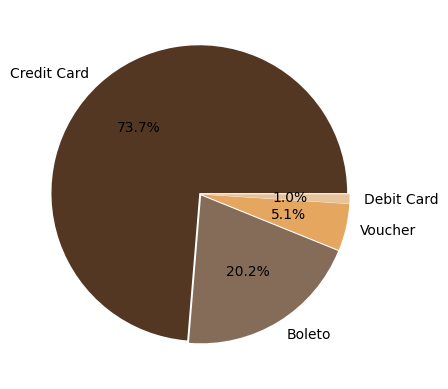

In [48]:
# Mendefinisikan maising-maising bagian pie chart
tipe = ('Credit Card', 'Boleto', 'Voucher', 'Debit Card')
total = [payment_counts.get('credit_card', 0), payment_counts.get('boleto', 0),
         payment_counts.get('voucher', 0), payment_counts.get('debit_card', 0)]
colors = ('#543723', '#856C59', '#E5A65F', '#E5C49C')
explode = (0.01, 0.01, 0.01, 0.01)

# Membuat pie chart
plt.pie(
    x=total,
    labels=tipe,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

**Insight:**
- Metode pembayaran yang paling banyak digunakan selama bulan Desember 2016 adalah **credit_card** dengan jumlah 4838 kali.

## Conclusion

1. **Apa kategori produk dengan jumlah penjualan tertinggi pada bulan Desember, yang umumnya dibeli ornag untuk menyambut Natal dan Tahun Baru?**
- Berdasarkan analisis data yang telah dilakukan, diperoleh informais bahwa Cama Mesa Banho menjadi kategori produk yang paling banyak dibeli di bulan Desember. Untuk memanfaatkan momen Natal dan Tahun Baru, *users* mungkin dapat memberikan promosi, seperti Buy 2 Get 1 Free untuk produk pada kategori ini.


2. **Berapa persentase transaksi pada masing-masing metode pembayaran yang dilakukan di bulan Desember?**
- Berdasarkan analisis data yang telah dilakukan, diperoleh informasi bahwa jenis metode pembayaran yang paling banyak digunakan di bulan Desember adalah credit_card. Untuk memaksimalkan tujuan pada pertanyaan pertama, *users* mungkin dapat memberikan promosi tambahan untuk costumer yang melakukan pembayaran dengan Credit Card.